In [1]:
from src.datasets.libir2mix import Libri2Mix
from torch.utils.data import DataLoader
from src.common.train_utils import collate_fn
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = Libri2Mix(train=True)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)
mixed_voice, clean_voice, utterance, sample_voice = next(iter(dataloader))     

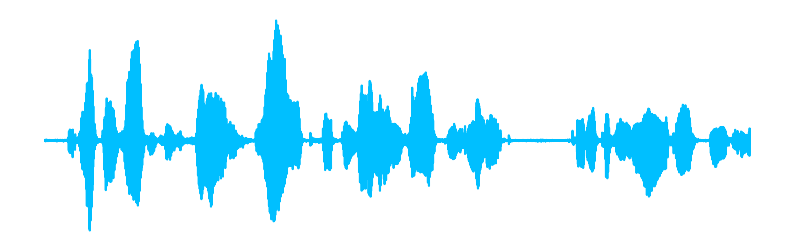

In [32]:
sns.set_style("white")
plt.figure(figsize=(10, 3))
sns.lineplot(data=sample_voice.detach().cpu().numpy(), color='deepskyblue')
plt.xticks([]) 
plt.yticks([]) 
sns.despine()
plt.axis('off')
plt.show()

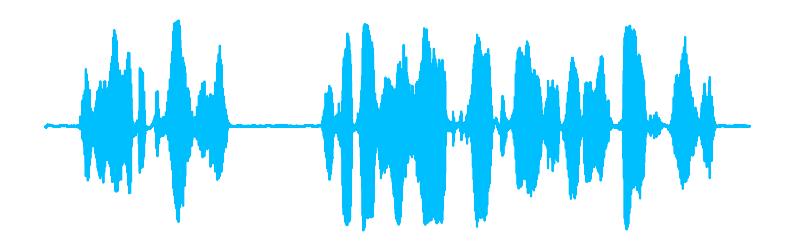

In [36]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=clean_voice.detach().cpu().numpy(), color='deepskyblue')
plt.xticks([]) 
plt.yticks([]) 
sns.despine()
plt.axis('off')
plt.show()

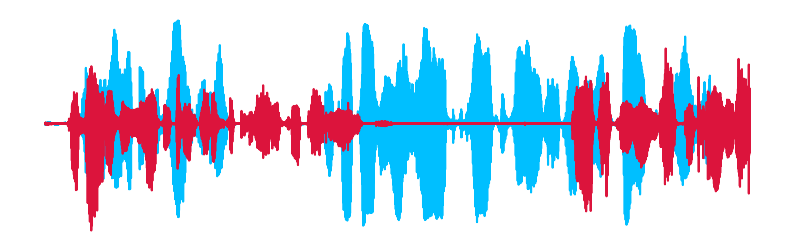

In [34]:
noise_voice = mixed_voice - clean_voice
plt.figure(figsize=(10, 3))
sns.lineplot(data=clean_voice.detach().cpu().numpy(), color='deepskyblue')
sns.lineplot(data=noise_voice.detach().cpu().numpy(), color='crimson')
plt.xticks([]) 
plt.yticks([]) 
sns.despine()
plt.axis('off')
plt.show()

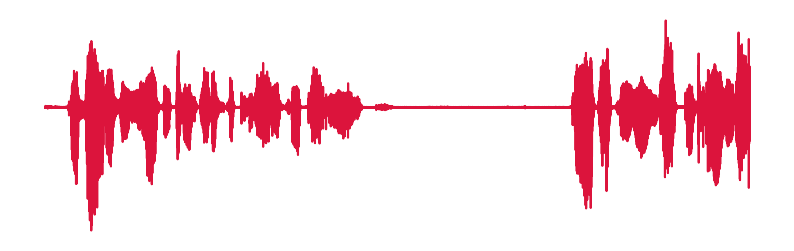

In [35]:

plt.figure(figsize=(10, 3))
sns.lineplot(data=noise_voice.detach().cpu().numpy(), color='crimson')
plt.xticks([]) 
plt.yticks([]) 
sns.despine()
plt.axis('off')
plt.show()

In [37]:
print(utterance)

['EVERY WAY BUT THE RIGHT WAY LOOK UP OVER YOUR HEAD CRIED THE VOICE RATHER A HARSH VOICE']


In [10]:
colors = sns.color_palette("deep", 10)
colors

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [6]:
colors = sns.color_palette("deep", 10)
colors = [colors[0],colors[2], colors[5], colors[6], colors[7], colors[3]]

# 0 oracle, 1 -linear, 2 - CA , 3 - Baselline  4 - No residual
# 5 - Loss, 60 Filter, 7- DP

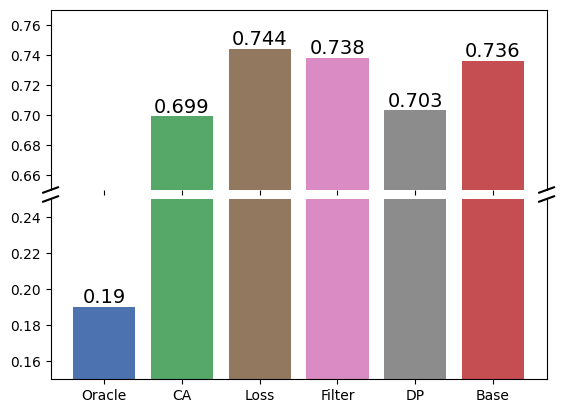

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
names = [ 'Oracle', 'CA', 'Loss','Filter', 'DP', 'Base']
values = [0.19, 0.699, 0.744, 0.738, 0.703, 0.736]

# Create a figure with two subplots sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # Adjust the spacing between the two parts

# Set bar colors using seaborn's color palette

# Upper subplot for part of the data with higher values
ax1.bar(names, values, color=colors)
ax1.set_ylim(0.65, 0.77)  # Set the limits for the upper part
ax1.spines['bottom'].set_visible(False)  # Hide the bottom spine

# Lower subplot for part of the data with lower values
ax2.bar(names, values, color=colors)
ax2.set_ylim(0.15, 0.25)  # Set the limits for the lower part
ax2.spines['top'].set_visible(False)  # Hide the top spine


# Adding values on top of each bar
for ax in [ax1]:
    for idx, bar in enumerate(ax.patches):
        if idx == 0:
            continue
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3),
                ha='center', va='bottom', fontsize=14, color='black')
for ax in [ax2]:
    for idx, bar in enumerate(ax.patches):
        if idx != 0:
            continue
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3),
                ha='center', va='bottom', fontsize=14, color='black')

# Break marks as diagonal lines
d = .015  # Length of diagonal line
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)  # Top-right diagonal
kwargs.update(transform=ax2.transAxes)  # Switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)  # Bottom-left diagonal
ax2.plot((1-d, 1+d), (1-d, 1+d), **kwargs)  # Bottom-right diagonal

plt.show()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
names = ['Oracle', 'CA Filter', 'Loss','Filter Every', 'Data Point', 'Baselline']
values = [0.706, 0.7435, 0.7384, 7034,]

# Define figure size and DPI
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 4), dpi=1000)  # Example size: 10x8 inches, 100 DPI
fig.subplots_adjust(hspace=0.05)  # Adjust the spacing between the two parts

# Set bar colors using seaborn's color palette
colors = sns.color_palette("hsv", len(names))

# Upper subplot for part of the data with higher values
ax1.bar(names, values, color=colors)
ax1.set_ylim(0.65, 1.05)  # Set the limits for the upper part
ax1.spines['bottom'].set_visible(False)  # Hide the bottom spine

# Lower subplot for part of the data with lower values
ax2.bar(names, values, color=colors)
ax2.set_ylim(0.15, 0.25)  # Set the limits for the lower part
ax2.spines['top'].set_visible(False)  # Hide the top spine

# Adding values on top of each bar
for ax in [ax1, ax2]:
    for idx, bar in enumerate(ax.patches):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}',
                ha='center', va='bottom', fontsize=14, color='black')

# Break marks as diagonal lines
d = .015  # Length of diagonal line
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)  # Top-right diagonal
kwargs.update(transform=ax2.transAxes)  # Switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)  # Bottom-left diagonal
ax2.plot((1-d, 1+d), (1-d, 1+d), **kwargs)  # Bottom-right diagonal

plt.show()


ValueError: Image size of 8472x105679927 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 10000x4000 with 2 Axes>